# Anomaly Detection and Recommender Systems

# 1. Anomaly Detection

In this part, we will implement an anomaly detection algorithm to detect anomalous behavior in server computers.

In [122]:
import mat4py as mat
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import math

In [4]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex8data1.mat")

In [704]:
X = data1["X"]
Xval = data1["Xval"]
yval = data1["yval"]

X_mat = np.mat(X)
Xval_mat = np.mat(Xval)
yval_mat = np.mat(yval)

Text(0,0.5,u'Throughput (mb/s)')

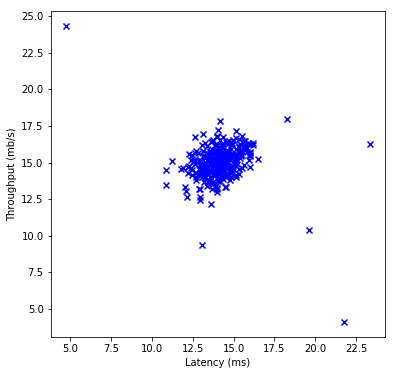

In [19]:
plt.figure(num = 1, figsize = (6, 6))

plt.scatter(np.array(X_mat[:, 0]), np.array(X_mat[:, 1]), marker = "x", color = "blue")
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

The Gaussian distribution is given by

p(x; mu, sigma^2) = (1/(2*pi*sigma^2)**0.5) * exp(-(x-mu)^2/(2*sigma^2))

In [47]:
def estimateGaussian(X):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    mu = np.mat(np.zeros((n, 1)))
    sigma2 = np.zeros((n, 1))
    
    for j in range(0, n):
        mu[j] = 1/m * sum(X[:, j])
        sigma2[j] = 1/m * sum(np.power((X[:, j] - mu[j]), 2))
    
    
    return mu, sigma2

In [51]:
mu = estimateGaussian(X_mat)[0]
sigma2 = estimateGaussian(X_mat)[1]

In [86]:
def diag(sigma2):
    size = 0
    
    size = max(np.shape(sigma2)[0], np.shape(sigma2)[1])
    sigma2_diag = np.zeros((size, size))
        
    for i in range(0, size):
        sigma2_diag[i, i] = sigma2[i] 
    
    
    return sigma2_diag

In [177]:
def multivariateGaussian(X, mu, sigma2):
    k = len(mu)
    
    mu_mat = np.transpose(np.mat(mu))
    mu_all = np.mat(np.zeros((np.shape(X)[0], np.shape(X)[1])))
    
    for i in range(0, np.shape(X)[0], 1):
        mu_all[i] = mu_mat
    
    p = 1
    for j in range(0, k, 1):
        p = np.multiply(p, 1 / ((2 * math.pi * sigma2[j][0]) ** 0.5) * np.exp(-np.power(X[:, j] - mu_all[:, j], 2) / (2 * sigma2[j][0])))
    
    
    return p

In [251]:
X1 = np.arange(0, 35.5, 0.5)
X2 = np.arange(0, 35.5, 0.5)
X1_plot, X2_plot = np.meshgrid(X1, X2)
X1_plot_2 = np.reshape(X1_plot, (np.shape(X1_plot)[0] * np.shape(X1_plot)[1], 1))
X2_plot_2 = np.reshape(X2_plot, (np.shape(X2_plot)[0] * np.shape(X2_plot)[1], 1))
XX = np.mat(np.hstack((X1_plot_2, X2_plot_2)))
Z = multivariateGaussian(XX, mu, sigma2)
Z = np.reshape(Z, (len(X1), len(X2)))

(0, 30)

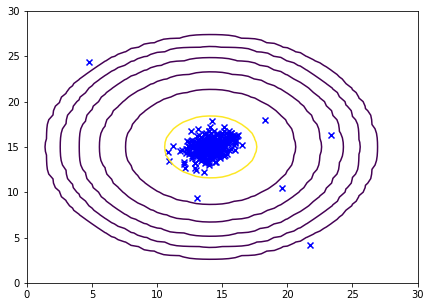

In [334]:
plt.figure(num = 1, figsize = (7, 5))

plt.scatter(np.array(X_mat[:, 0]), np.array(X_mat[:, 1]), marker = "x", color = "blue")
plt.contour(X1_plot, X2_plot, Z, 7, levels = np.logspace(-20, 1, 7))
plt.xlim((0, 30))
plt.ylim((0, 30))


In [375]:
pval = multivariateGaussian(Xval_mat, mu, sigma2)

pval_mat = np.mat(pval)

In [624]:
def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    
    stepsize = ((max(pval) - min(pval)) / 1000)[0, 0]
    epsilon = np.transpose(np.mat(np.zeros(len(pval))))
    
    idx = min(pval)[0, 0]
    while idx < max(pval)[0, 0] + stepsize * 2:
        epsilon[:, :] = idx
        predictions = pval < epsilon
        
        tp = 0
        for i in range(0, np.shape(yval)[0], 1):
            if yval[i, :][0, 0] == 1 and predictions[i, :][0, 0] == 1:
                tp = tp + 1
        
        fp = 0
        for i in range(0, np.shape(yval)[0], 1):
            if yval[i, :][0, 0] == 0 and predictions[i, :][0, 0] == 1:
                fp = fp + 1
                
        fn = 0
        for i in range(0, np.shape(yval)[0], 1):
            if yval[i, :][0, 0] == 1 and predictions[i, :][0, 0] == 0:
                fn = fn + 1
        
        prec = 0
        if tp + fp == 0:
            prec = 0
        else:
            prec = tp / (tp + fp)
        
        rec = 0
        if tp + fn == 0:
            rec = 0
        else:
            rec = tp / (tp + fn)
        
        F1 = 0
        if prec + rec == 0:
            F1 = 0
        else:
            F1 = (2 * prec * rec) / (prec + rec)
            
            
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = idx
        
        
        idx = idx + stepsize
        
    
    
    return bestF1, bestEpsilon

In [625]:
F1 = selectThreshold(yval_mat, pval_mat)[0]
epsilon = selectThreshold(yval_mat, pval_mat)[1]

In [570]:
p = multivariateGaussian(X_mat, mu, sigma2)

In [644]:
outliers = []

for i in range(0, np.shape(p)[0], 1):
    if p[i, :][0, 0] < epsilon:
        outliers.append(i)

outliers = np.array(outliers)

(0, 30)

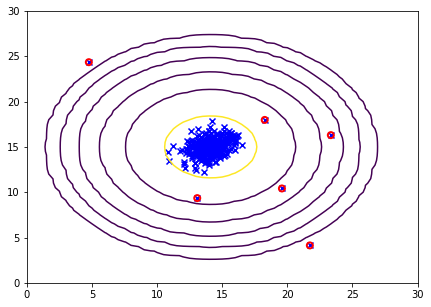

In [660]:
plt.figure(num = 1, figsize = (7, 5))

plt.scatter(np.array(X_mat[:, 0]), np.array(X_mat[:, 1]), marker = "x", color = "blue")
plt.contour(X1_plot, X2_plot, Z, 7, levels = np.logspace(-20, 1, 7))
plt.scatter(np.array(X_mat[outliers][:, 0]), np.array(X_mat[outliers][:, 1]), marker = "o", c = "", edgecolors = "red", linewidths = 2)
plt.xlim((0, 30))
plt.ylim((0, 30))

High dimensional dataset

In [661]:
data2 = mat.loadmat("E:\\Machine Learning\\1\\ex8data2.mat")

In [705]:
X = data2["X"]
Xval = data2["Xval"]
yval = data2["yval"]

X_mat = np.mat(X)
Xval_mat = np.mat(Xval)
yval_mat = np.mat(yval)

In [672]:
def estimateGaussian(X):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    mu = np.mat(np.zeros((n, 1)))
    sigma2 = np.zeros((n, 1))
    
    for j in range(0, n):
        mu[j] = 1/m * sum(X[:, j])
        sigma2[j] = 1/m * sum(np.power((X[:, j] - mu[j]), 2))
    
    
    return mu, sigma2

In [674]:
mu = estimateGaussian(X_mat)[0]
sigma2 = estimateGaussian(X_mat)[1]

In [677]:
def multivariateGaussian(X, mu, sigma2):
    k = len(mu)
    
    mu_mat = np.transpose(np.mat(mu))
    mu_all = np.mat(np.zeros((np.shape(X)[0], np.shape(X)[1])))
    
    for i in range(0, np.shape(X)[0], 1):
        mu_all[i] = mu_mat
    
    p = 1
    for j in range(0, k, 1):
        p = np.multiply(p, 1 / ((2 * math.pi * sigma2[j][0]) ** 0.5) * np.exp(-np.power(X[:, j] - mu_all[:, j], 2) / (2 * sigma2[j][0])))
    
    
    return p

In [709]:
p = multivariateGaussian(X_mat, mu, sigma2)
pval = multivariateGaussian(Xval_mat, mu, sigma2)
pval_mat = np.mat(pval)

In [710]:
F1 = selectThreshold(yval_mat, pval_mat)[0]
epsilon = selectThreshold(yval_mat, pval_mat)[1]

# 2. Recommender Systems

In this part, we will implement the collaborative filtering learning algorithm and apply it to a dataset of movie ratings. This dataset consists of ratings on a scale of 1 to 5. The dataset has 943 users, and 1682 movies.

In [715]:
data3 = mat.loadmat("E:\\Machine Learning\\1\\ex8_movies.mat")

In [723]:
Y = data3["Y"]
R = data3["R"]

Y_mat = np.mat(Y)
R_mat = np.mat(R)

Text(0,0.5,u'Movies')

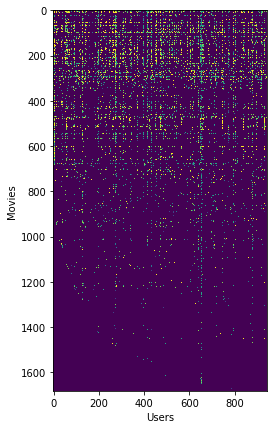

In [732]:
plt.figure(num = 1, figsize = (7, 7))

plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

In [733]:
params = mat.loadmat("E:\\Machine Learning\\1\\ex8_movieParams.mat")

In [762]:
num_users = 4
num_movies = 5
num_features = 3
X = params["X"]
Theta = params["Theta"]

X_mat = np.mat(X)
Theta_mat = np.mat(Theta)

In [763]:
params.keys()

[u'num_users', u'X', u'num_features', u'num_movies', u'Theta']

In [774]:
X_mat_reduce = X_mat[0: num_movies, 0: num_features]
Theta_mat_reduce = Theta_mat[0: num_users, 0: num_features]
Y_mat_reduce = Y_mat[0: num_movies, 0: num_users]
R_mat_reduce = R_mat[0: num_movies, 0: num_users]

In [825]:
def costFunction(X, Y, theta, R):
    J = np.power(X * np.transpose(theta) - Y, 2)
    
    sum_J = 0
    for i in range(0, np.shape(J)[0], 1):
        for j in range(0, np.shape(J)[1], 1):
            if R[i, j] != 0:
                sum_J = sum_J + J[i, j]
    
    sum_J = 1/2 * sum_J
    
    
    X_grad_mat = np.multiply(X * np.transpose(theta) - Y, R) * theta
    Theta_grad_mat = np.transpose(np.multiply(X * np.transpose(theta) - Y, R)) * X
    
    
    return X_grad_mat, Theta_grad_mat

In [827]:
X_grad = costFunction(X_mat_reduce, Y_mat_reduce, Theta_mat_reduce, R_mat_reduce)[0]
Theta_grad = costFunction(X_mat_reduce, Y_mat_reduce, Theta_mat_reduce, R_mat_reduce)[1]

In [871]:
def costFunctionReg(X, Y, Theta, R, lambda1):
    J = np.power(X * np.transpose(Theta) - Y, 2)
    
    sum_J = 0
    for i in range(0, np.shape(R)[0], 1):
        for j in range(0, np.shape(R)[1], 1):
            if R[i, j] == 1:
                 sum_J = sum_J + J[i, j]
            
        
    sum_J = 1/2 * sum_J + lambda1/2 * sum(np.sum(np.power(Theta_mat_reduce, 2), axis = 1))[0, 0] + \
                lambda1/2 * sum(np.sum(np.power(X_mat_reduce, 2), axis = 1))[0, 0]
    
    
    X_grad = (X * np.transpose(Theta) - Y) * Theta + lambda1 * X
    Theta_grad = np.transpose(X * np.transpose(Theta) - Y) * X + lambda1 * Theta
                    
    
    return sum_J, X_grad, Theta_grad

In [873]:
J_reg = costFunctionReg(X_mat_reduce, Y_mat_reduce, Theta_mat_reduce, R_mat_reduce, 1.5)[0]
X_grad_reg = costFunctionReg(X_mat_reduce, Y_mat_reduce, Theta_mat_reduce, R_mat_reduce, 1.5)[1]
Theta_grad_reg = costFunctionReg(X_mat_reduce, Y_mat_reduce, Theta_mat_reduce, R_mat_reduce, 1.5)[2]

Learning movie recommendations

In [883]:
aa = open("E:\\Machine Learning\\1\\movie_ids.txt", "r")

In [884]:
lines = aa.readlines()

In [970]:
moviesList = []
lines_story = []

for i in range(0, len(lines), 1):
    lines[i] = lines[i].replace("\n", "")
    lines_new = ""
    story = ""
    
    j = 0
    while (lines[i][j].isdigit()):
        j = j + 1
    
    j = j + 1
    
    lines_new += "[" + str(i + 1) + ",1]" + " = "
    
    while (j < len(lines[i])):
        lines_new += lines[i][j]
        story += lines[i][j]
        j  = j + 1
    
    
    moviesList.append(lines_new)
    lines_story.append(story)


In [983]:
my_ratings = np.zeros(len(lines))

my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

print "New user ratings: \n"
for i in range(0, len(my_ratings), 1):
    if my_ratings[i] > 0:
        print "Rated " + str(int(my_ratings[i])) + " " + "for " + lines_story[i]
        

New user ratings: 

Rated 4 for Toy Story (1995)
Rated 3 for Twelve Monkeys (1995)
Rated 5 for Usual Suspects, The (1995)
Rated 4 for Outbreak (1995)
Rated 5 for Shawshank Redemption, The (1994)
Rated 3 for While You Were Sleeping (1995)
Rated 5 for Forrest Gump (1994)
Rated 2 for Silence of the Lambs, The (1991)
Rated 4 for Alien (1979)
Rated 5 for Die Hard 2 (1990)
Rated 5 for Sphere (1998)


In [984]:
data4 = mat.loadmat("E:\\Machine Learning\\1\\ex8_movies.mat")

In [1030]:
Y = data4["Y"]
R = data4["R"]

Y_mat = np.mat(Y)
R_mat = np.mat(R)
my_ratings_mat = np.transpose(np.mat(my_ratings))

ratings_R = my_ratings != 0
ratings_R_num = np.zeros(len(ratings_R))
for i in range(0, len(ratings_R), 1):
    if ratings_R[i] == True:
        ratings_R_num[i] = 1
    else:
        ratings_R_num[i] = 0

        
ratings_R_num_mat = np.transpose(np.mat(ratings_R_num))

Y_mat_new = np.hstack((my_ratings_mat, Y_mat))
R_mat_new = np.hstack((ratings_R_num_mat, R_mat))

In [1179]:
def normalizeRatings(Y, R):
    m = np.shape(Y)[0]
    n = np.shape(Y)[1]
    Ymean_mat = np.transpose(np.mat(np.zeros(m)))
    Ynorm_mat = np.mat(np.zeros((m, n)))
    count_mat = np.transpose(np.mat(np.zeros(m)))
    
    Ymean_mat = np.sum(np.multiply(Y, R), axis = 1)
    count_mat = np.sum(R, axis = 1)
    
    Ymean_mat = np.multiply(Ymean_mat, 1/count_mat)
    
    for i in range(0, m, 1):
        for j in range(0, n, 1):
            if R[i, j] != 0:
                Ynorm_mat[i, j] = Y[i, j] - Ymean_mat[i, :]
                
        
    return Ynorm_mat, Ymean_mat

In [1180]:
Ynorm_mat = normalizeRatings(Y_mat_new, R_mat_new)[0]
Ymean_mat = normalizeRatings(Y_mat_new, R_mat_new)[1]

In [1183]:
num_users = np.shape(Y_mat_new)[1]
num_movies = np.shape(Y_mat_new)[0]
num_features = 10

In [1197]:
X = np.random.normal(0, 2, (10, 10))

In [1198]:
X

array([[-0.07161524, -1.23858892,  4.10206056,  2.54828701,  2.03617823,
        -1.90184733, -3.22818121,  2.74524502,  1.54388228, -1.76442677],
       [ 1.69889393, -1.84850121, -2.50941415,  2.3566749 ,  0.01866507,
        -0.91958675,  1.79747424, -0.19805299,  2.81001758,  2.26699022],
       [ 0.57016933,  1.57430254,  3.13862716,  0.45533729, -0.8878766 ,
        -1.42354245, -1.58744396, -0.28164448, -0.84650989,  4.26532939],
       [ 1.53611461,  0.51380475, -1.92960616, -2.45152737, -3.452345  ,
         0.24391712,  0.21123477, -2.67468226, -1.91804531,  1.83590881],
       [ 2.25048211, -2.94461692,  2.69161043, -1.89279779,  1.66411111,
         0.2630985 , -3.65107922, -0.99407666, -2.96919302, -5.31543781],
       [ 2.55000349,  2.28488245,  2.13094277,  2.20159768,  1.82894198,
        -1.64700296, -2.03841471,  0.53943721,  2.41249   ,  0.65145893],
       [ 3.16961828, -2.12870154,  1.7701253 ,  2.20157367, -0.69755969,
        -1.8979417 ,  3.36369006,  1.85543663